In [85]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import math
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  

import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'iframe' # or 'colab' or 'iframe' or 'iframe_connected' or 'sphinx_gallery'
from math import log2, radians, cos, sqrt

pd.options.display.max_rows = 4000

from matplotlib.colors import ListedColormap


In [86]:
taem_phase_color_map_val = [0, 1, 2, 3]
taem_phase_color_map = ListedColormap(['red', 'blue', 'green', 'orange'])


a_l_phase_color_map = ListedColormap(['black', 'cyan', 'green', 'blue', 'orange', 'red'])

In [87]:
data_taem = pd.read_csv('taem_dump.csv')

data_taem['time'] = data_taem['dtg'].cumsum()

xali = -27500.7961639
data_taem['drpred'] = data_taem['rpred'] + xali

data_taem.head()

data_taem.dtypes

,dtg,wow,h,hdot,hddot,x,y,surfv,surfv_h,xdot,...,gssh,hk,xk,xexp,herrexp,nzc1,nzc2h,nzc2i,Unnamed: 117,time
0,0.14,False,134985.829286,-199.268117,-13.029764,-20857.353949,688434.704993,4742.965858,4738.778043,89.208107,...,2.8,17200.27278,-1638.510581,-2468.956667,0.0,0,0,0,NaN,0.14
1,0.14,False,134957.822634,-200.840694,-11.232697,-20855.618855,687775.609891,4741.966159,4737.711058,89.177135,...,2.8,17200.27278,-1638.510581,-2468.956667,0.0,0,0,0,NaN,0.28
2,0.14,False,134929.597091,-202.418070,-11.266967,-20853.878174,687116.662978,4740.961361,4736.638212,89.116467,...,2.8,17200.27278,-1638.510581,-2468.956667,0.0,0,0,0,NaN,0.42
3,0.14,False,134901.152506,-203.995741,-11.269077,-20852.133166,686457.864745,4739.953435,4735.561668,89.059150,...,2.8,17200.27278,-1638.510581,-2468.956667,0.0,0,0,0,NaN,0.56
4,0.16,False,134868.374700,-205.804666,-11.305781,-20850.132979,685705.135899,4738.799578,4734.328450,88.993832,...,2.8,17200.27278,-1638.510581,-2468.956667,0.0,0,0,0,NaN,0.72


dtg              float64
wow                 bool
h                float64
hdot             float64
hddot            float64
x                float64
y                float64
surfv            float64
surfv_h          float64
xdot             float64
ydot             float64
psd              float64
mach             float64
qbar             float64
cosphi           float64
costh            float64
weight           float64
gamma            float64
ovhd                bool
rwid              object
cubic_c3         float64
cubic_c4         float64
pbhc_0             int64
pbhc_1           float64
pbrc_0             int64
pbrc_1           float64
delrng             int64
dnzc               int64
dnzcl            float64
dnzll              int64
dnzul              int64
dpsac            float64
drpred           float64
dsbc_at          float64
dsbi               int64
eas_cmd          float64
emep             float64
eow              float64
eowerror         float64
eowhdul          float64


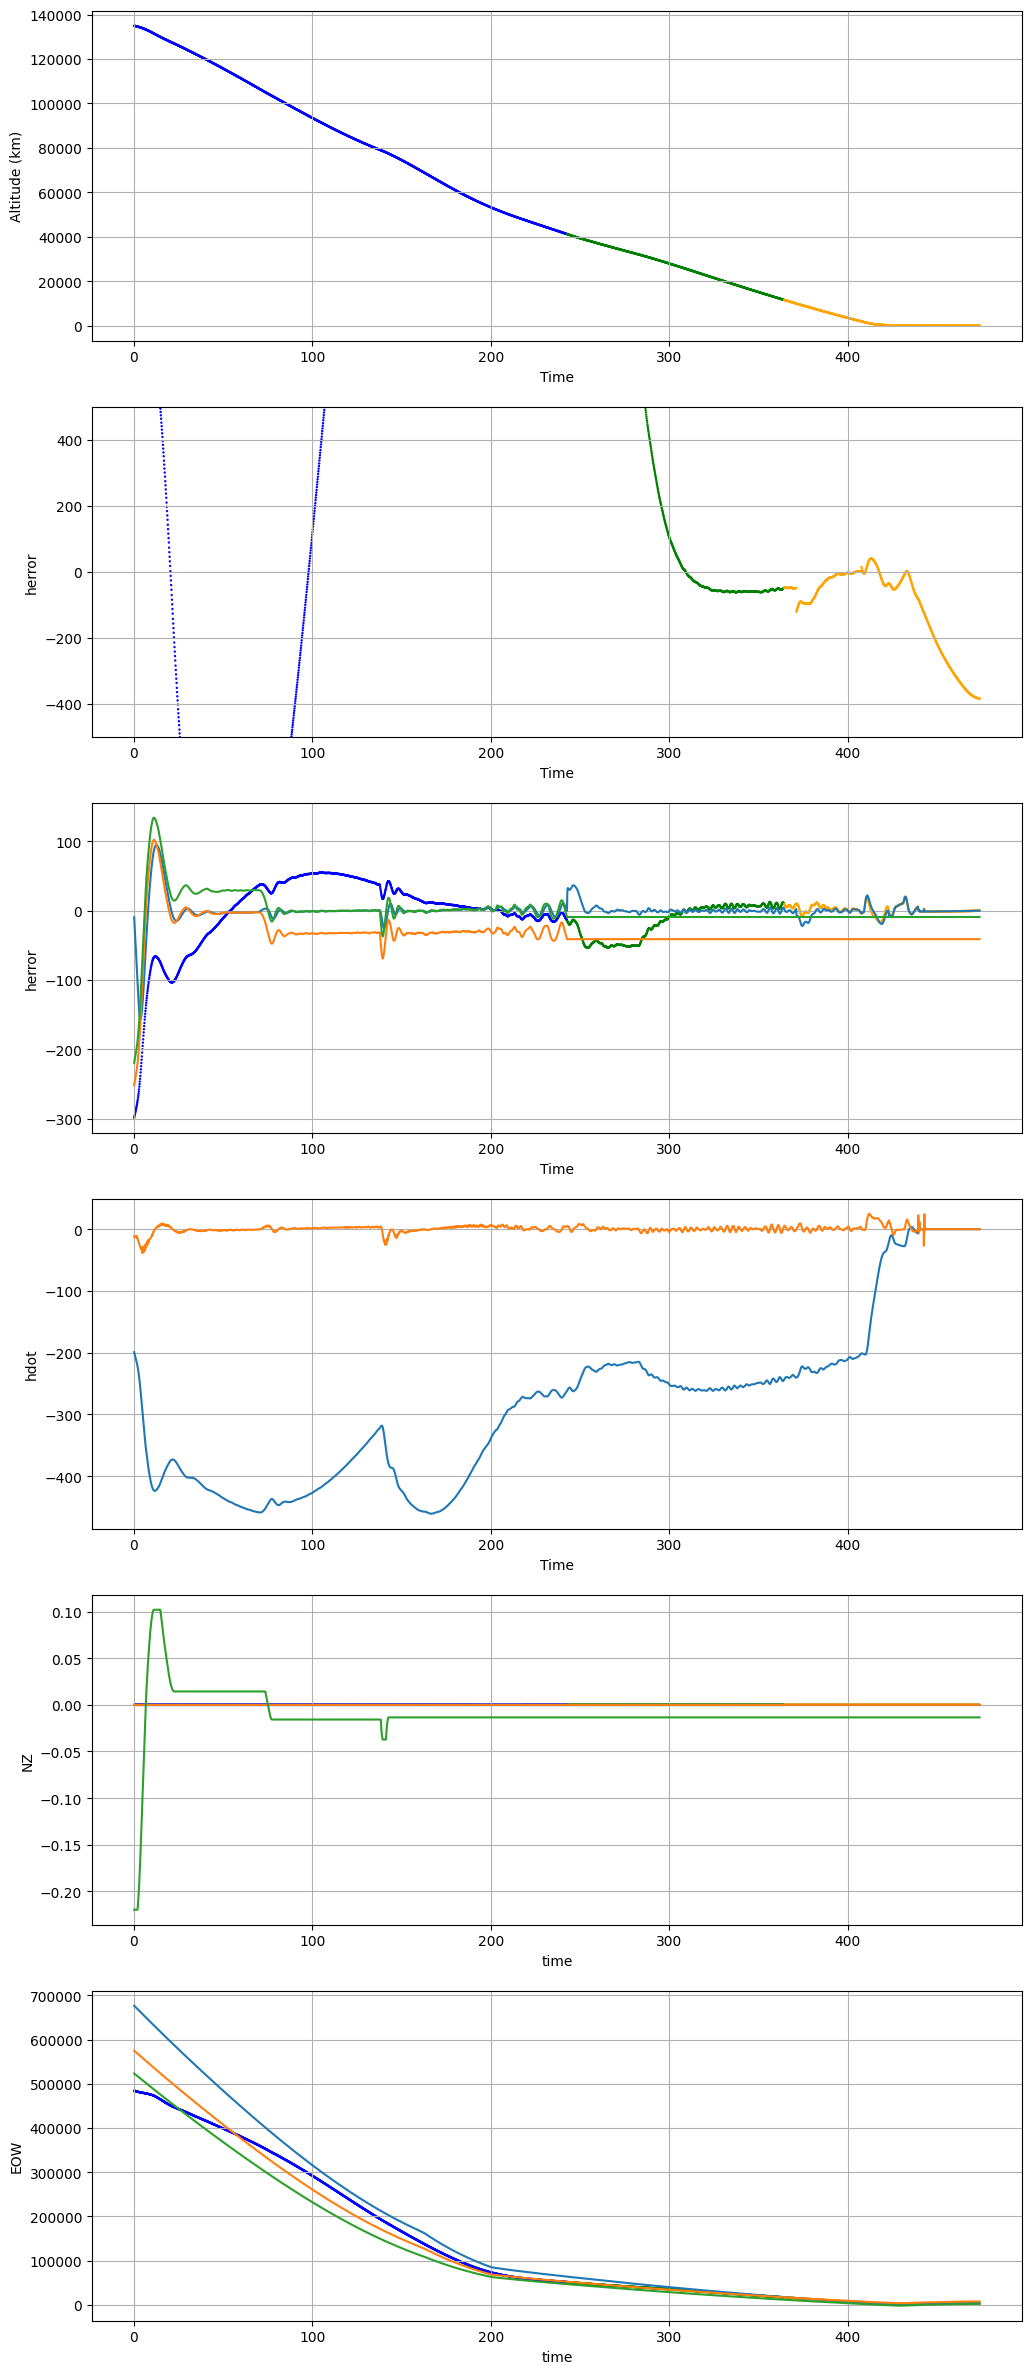

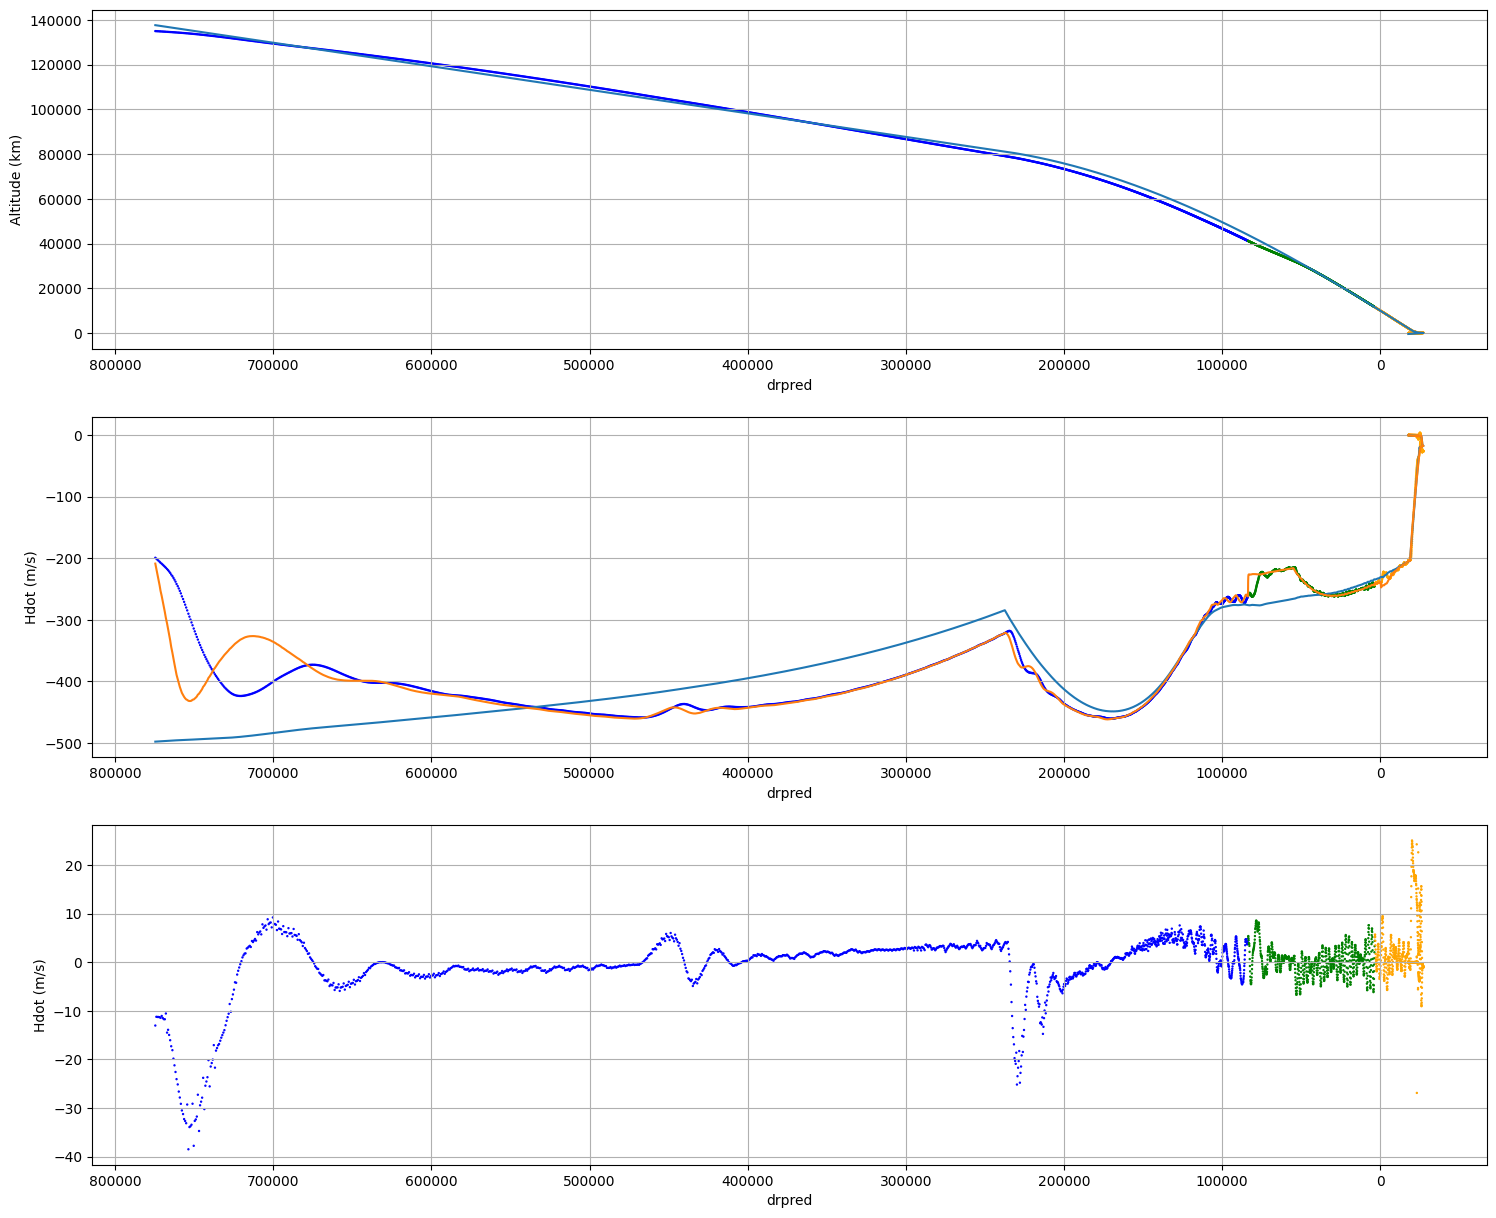

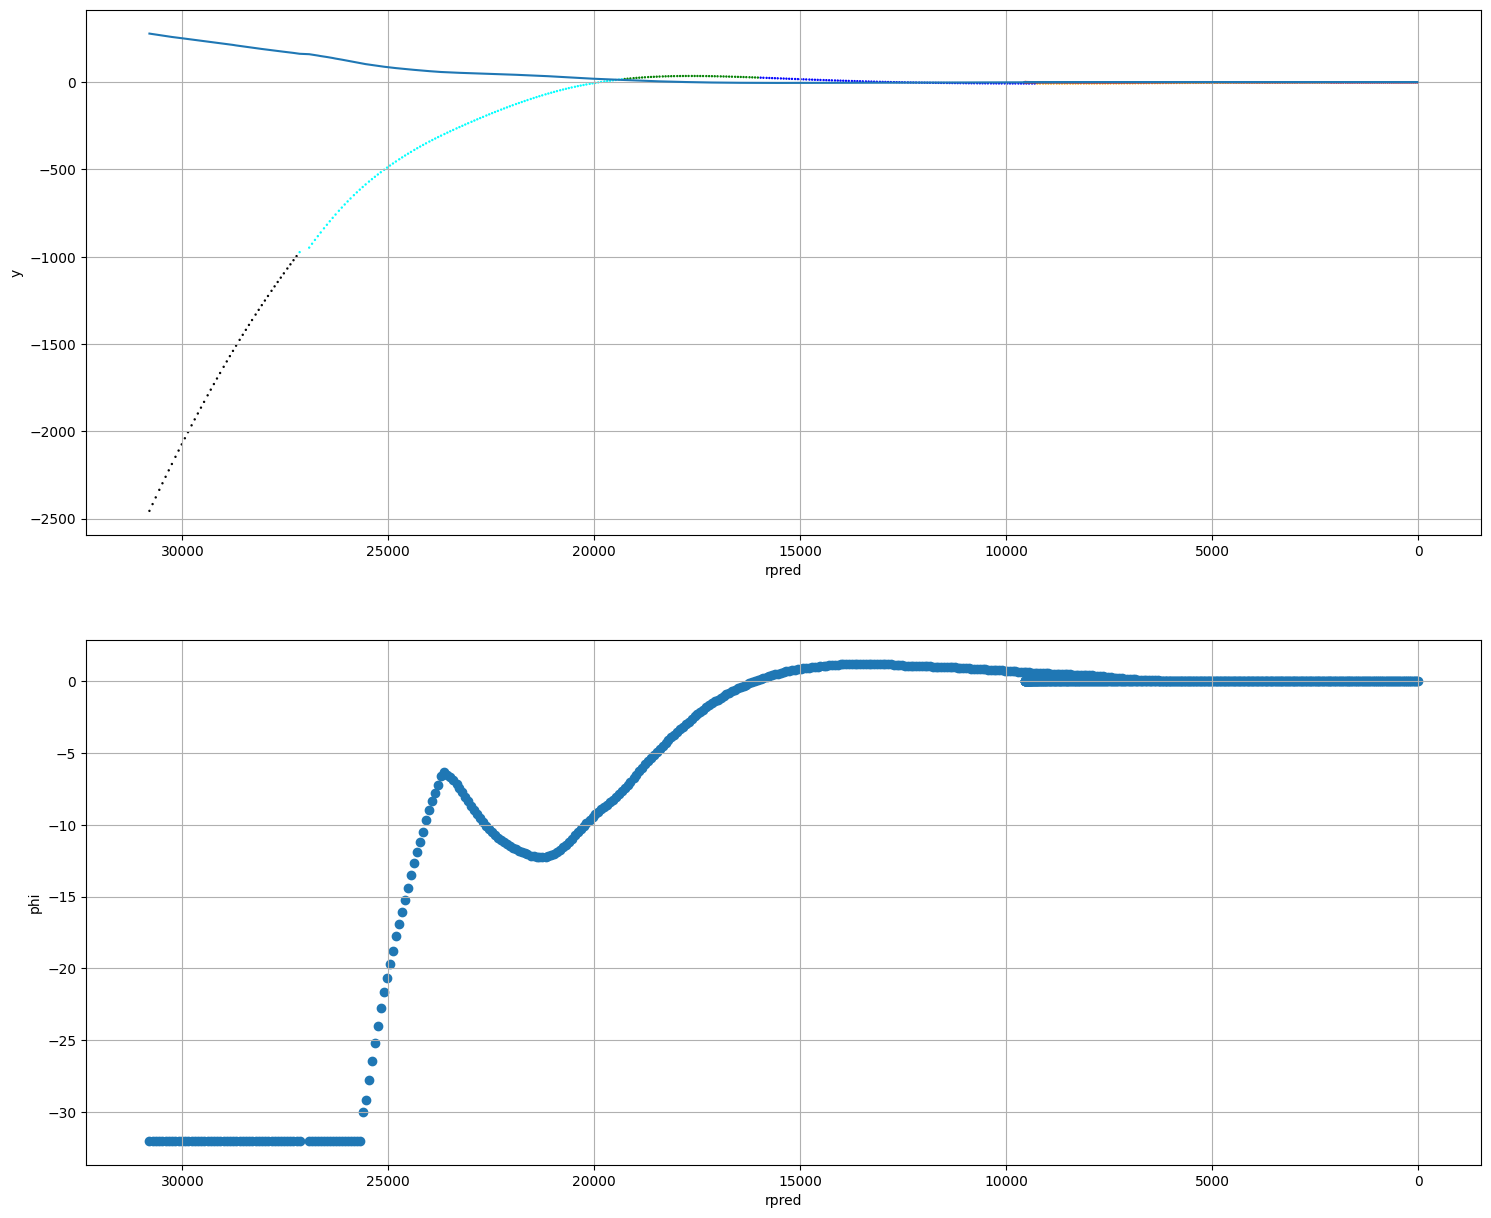

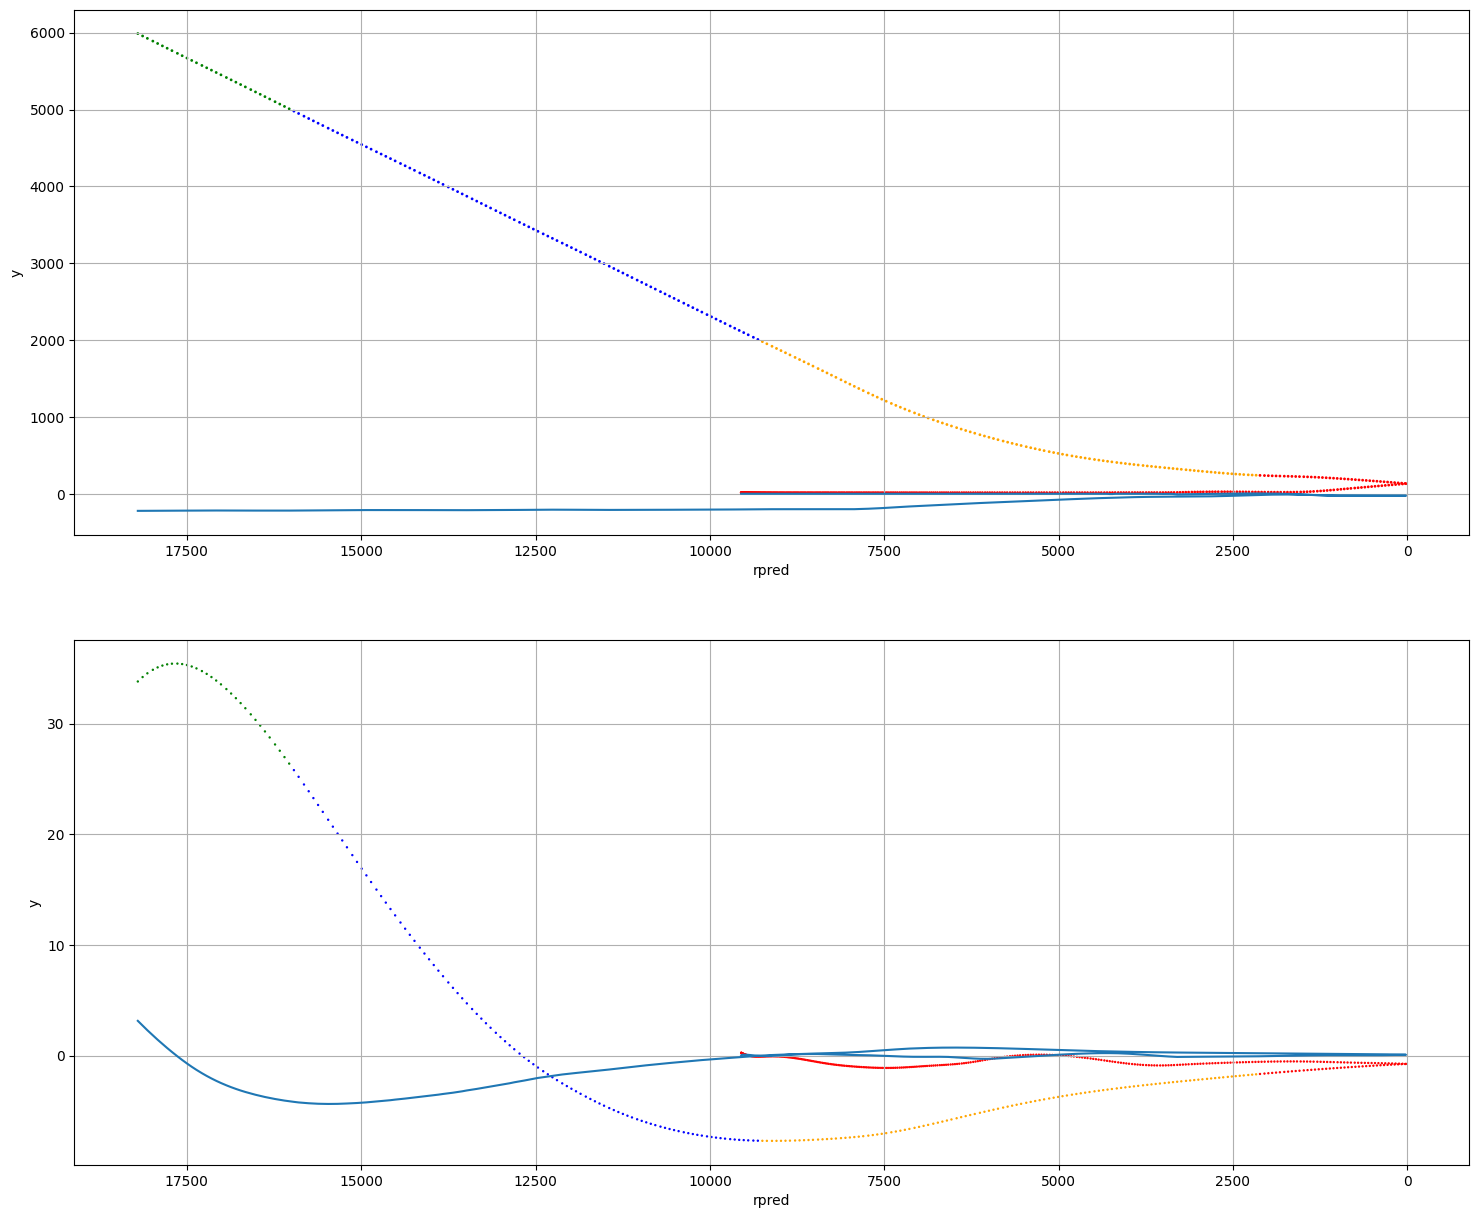

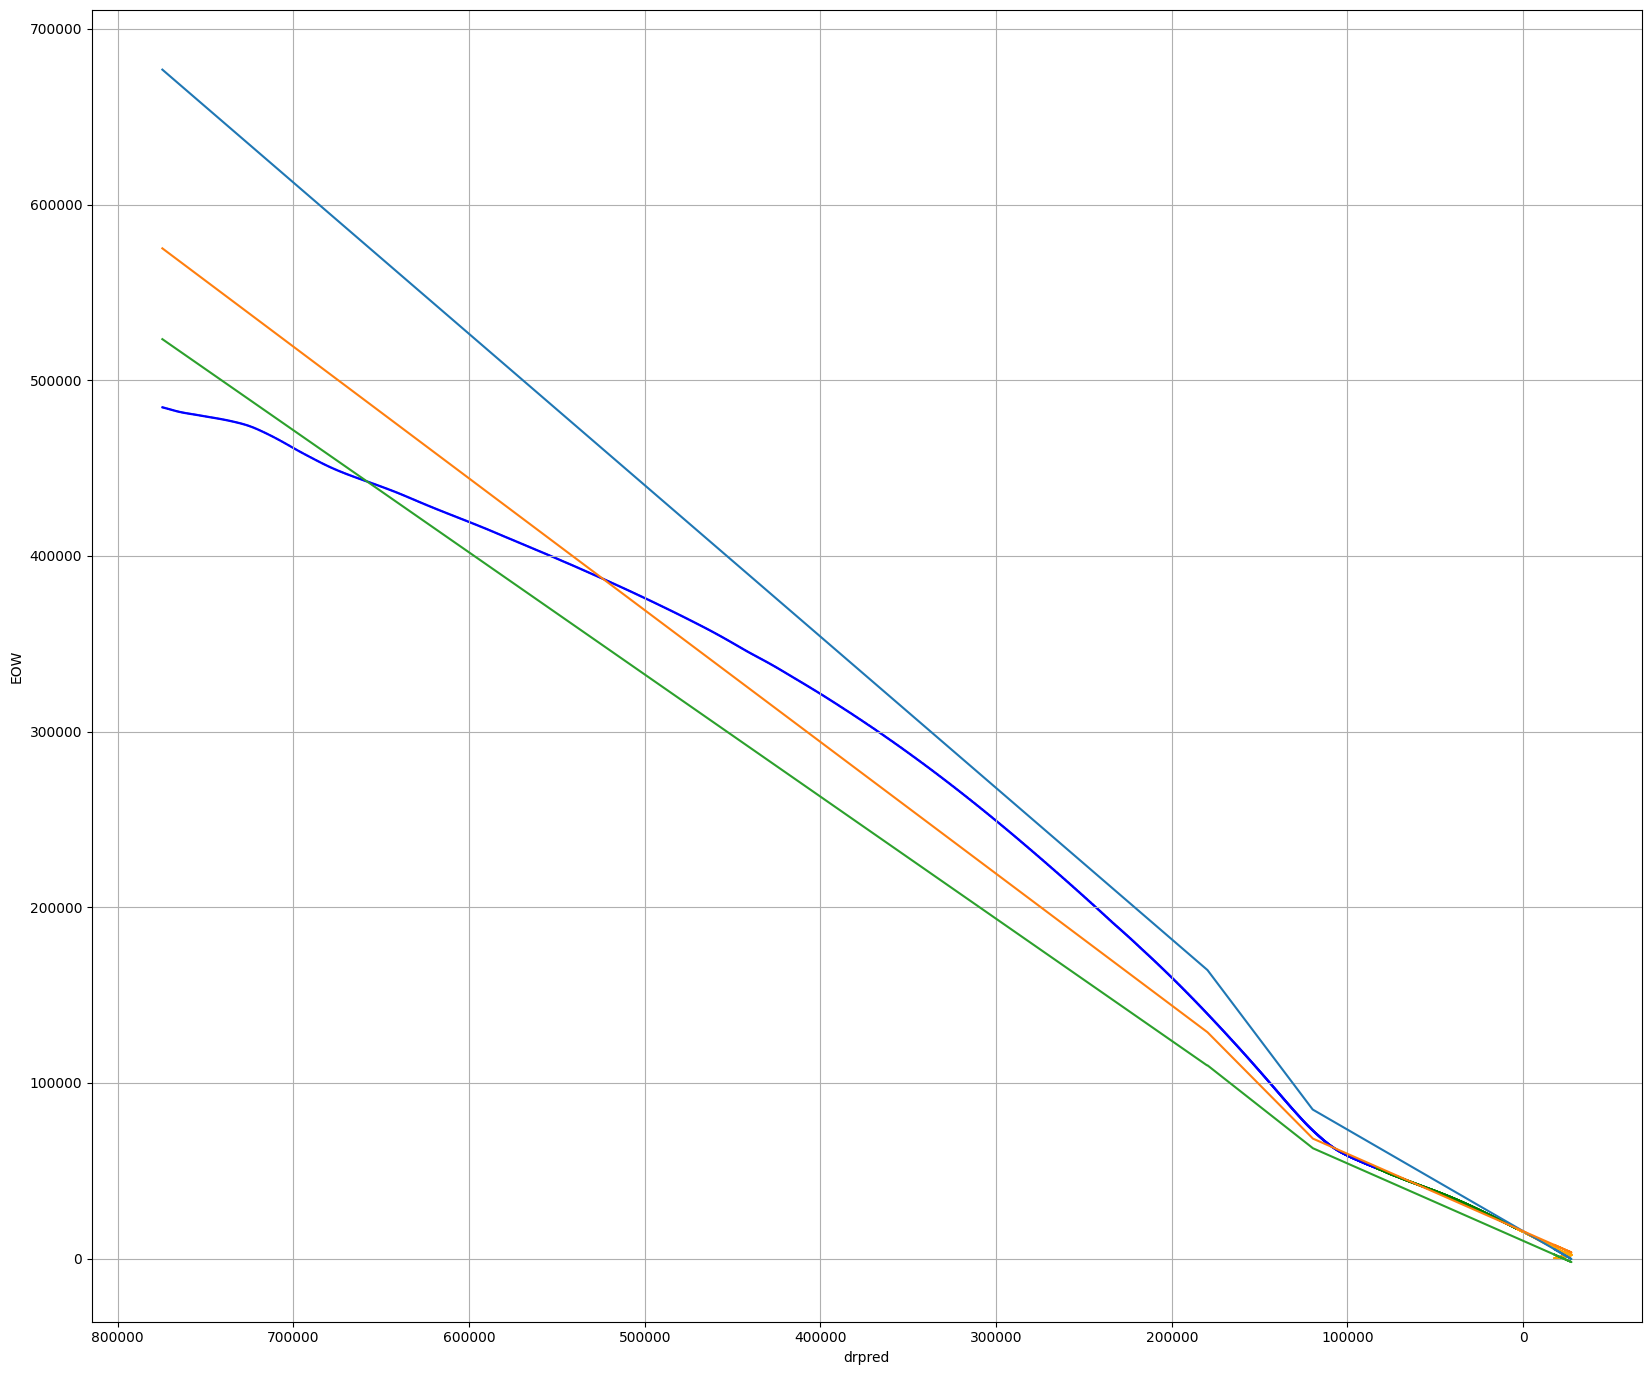

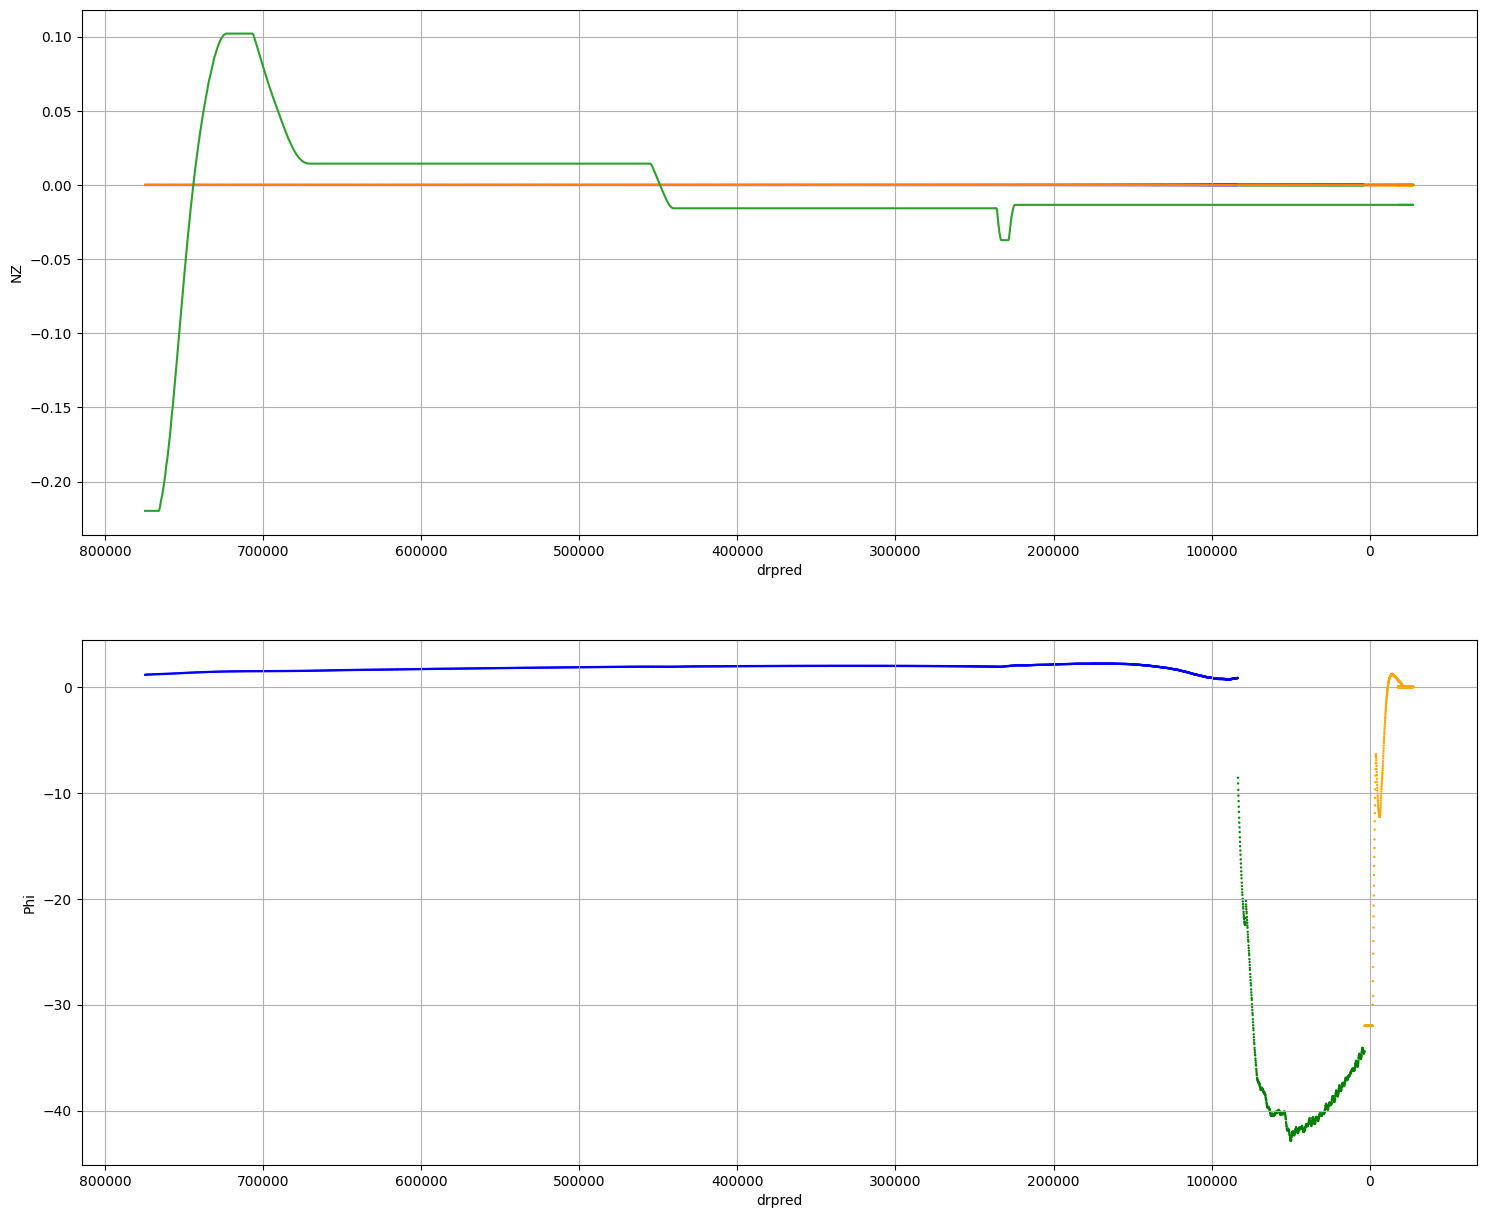

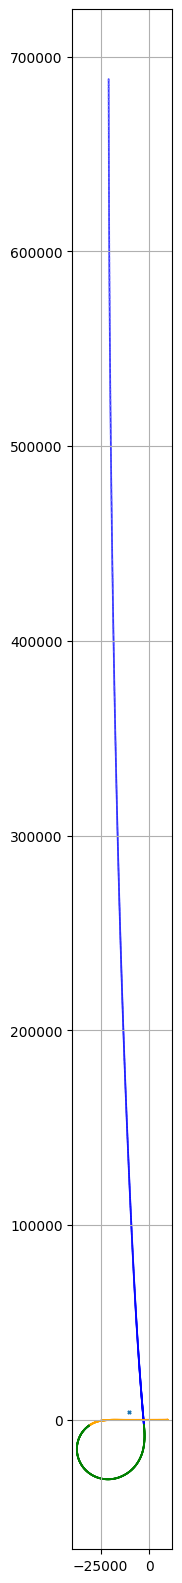

In [88]:
def taem_plots(data):
    
    

    
    fig_1, ax_1 = plt.subplots(nrows=6, ncols=1, figsize=(12, 5 * 6))

    plt_ = ax_1[0]
    plt_.scatter(data['time'], data['h'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)

    plt_.set_xlabel('Time')
    plt_.set_ylabel('Altitude (km)')
    plt_.grid()
    
    plt_ = ax_1[1]
    plt_.scatter(data['time'], data['herror'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)

    plt_.set_xlabel('Time')
    plt_.set_ylabel('herror')
    plt_.grid()
    plt_.set_ylim([-500, 500])
    
    plt_ = ax_1[2]
    plt_.scatter(data['time'], data['hderr'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)
    plt_.plot(data['time'], data['hderrc'])
    plt_.plot(data['time'], data['eowhdll'])
    plt_.plot(data['time'], data['eowhdul'])

    plt_.set_xlabel('Time')
    plt_.set_ylabel('herror')
    plt_.grid()
    
    plt_ = ax_1[3]
    plt_.plot(data['time'], data['hdot'])
    plt_.plot(data['time'], data['hddot'])

    plt_.set_xlabel('Time')
    plt_.set_ylabel('hdot')
    plt_.grid()
                               
    plt_ = ax_1[4]
    plt_.plot(data['time'], data['nzc'])
    plt_.plot(data['time'], data['dnzc'])
    plt_.plot(data['time'], data['dnzcl'])
    plt_.scatter(data['time'], data['nztotal'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)

    plt_.set_xlabel('time')
    plt_.set_ylabel('NZ')
    plt_.grid()
    
    plt_ = ax_1[5]
    plt_.scatter(data['time'], data['eow'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)
    plt_.plot(data['time'], data['es'])
    plt_.plot(data['time'], data['en'])
    plt_.plot(data['time'], data['emep'])
    

    plt_.set_xlabel('time')
    plt_.set_ylabel('EOW')
    plt_.grid()


    



                               
    
    

    fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(18, 15))

    plt_ = ax[0]
    plt_.scatter(data['drpred'], data['h'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)
    plt_.plot(data['drpred'], data['href'])

    plt_.set_xlabel('drpred')
    plt_.set_ylabel('Altitude (km)')
    plt_.grid()

    plt_.invert_xaxis()

  


    plt_ = ax[1]
    plt_.scatter(data['drpred'], data['hdot'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)
    plt_.plot(data['drpred'], data['hdref'])
    plt_.plot(data['drpred'], data['hdrefc'])

    plt_.set_xlabel('drpred')
    plt_.set_ylabel('Hdot (m/s)')
    plt_.grid()

    plt_.invert_xaxis()

    plt_ = ax[2]
    plt_.scatter(data['drpred'], data['hddot'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)

    plt_.set_xlabel('drpred')
    plt_.set_ylabel('Hdot (m/s)')
    plt_.grid()

    plt_.invert_xaxis()
    
    
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 15))
    
    a_l_data = data[data['iphase'] >= 3]

    plt_ = ax[0]
    plt_.scatter(a_l_data['rpred'], a_l_data['y'], s=0.5, c=a_l_data['p_mode'], cmap=a_l_phase_color_map, vmin=0, vmax=5)
    plt_.plot(a_l_data['rpred'], a_l_data['ydot'])

    plt_.set_xlabel('rpred')
    plt_.set_ylabel('y')
    plt_.grid()

    plt_.invert_xaxis()
    
    plt_ = ax[1]
    plt_.scatter(a_l_data['rpred'], a_l_data['phic_at'])

    plt_.set_xlabel('rpred')
    plt_.set_ylabel('phi')
    plt_.grid()

    plt_.invert_xaxis()
    
    
    
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 15))
    
    final_data = data[data['h'] < 6000]

    plt_ = ax[0]
    plt_.scatter(final_data['rpred'], final_data['h'], s=1, c=final_data['p_mode'], cmap=a_l_phase_color_map, vmin=0, vmax=5)
    plt_.plot(final_data['rpred'], final_data['hdot'])

    plt_.set_xlabel('rpred')
    plt_.set_ylabel('y')
    plt_.grid()

    plt_.invert_xaxis()
    
    plt_ = ax[1]
    plt_.scatter(final_data['rpred'], final_data['y'], s=0.5, c=final_data['p_mode'], cmap=a_l_phase_color_map, vmin=0, vmax=5)
    plt_.plot(final_data['rpred'], final_data['ydot'])

    plt_.set_xlabel('rpred')
    plt_.set_ylabel('y')
    plt_.grid()

    plt_.invert_xaxis()

     
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
    
    plt_ = ax
    plt_.scatter(data['drpred'], data['eow'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)
    plt_.plot(data['drpred'], data['es'])
    plt_.plot(data['drpred'], data['en'])
    plt_.plot(data['drpred'], data['emep'])
    

    plt_.set_xlabel('drpred')
    plt_.set_ylabel('EOW')
    plt_.grid()

    plt_.invert_xaxis()

    plt_.set_aspect('equal')


    
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 15))

    plt_ = ax[0]
    plt_.plot(data['drpred'], data['nzc'])
    plt_.plot(data['drpred'], data['dnzc'])
    plt_.plot(data['drpred'], data['dnzcl'])
    plt_.scatter(data['drpred'], data['nztotal'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)

    plt_.set_xlabel('drpred')
    plt_.set_ylabel('NZ')
    plt_.grid()

    plt_.invert_xaxis()
    
    
    plt_ = ax[1]
    plt_.scatter(data['drpred'], data['phic_at'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)

    plt_.set_xlabel('drpred')
    plt_.set_ylabel('Phi')
    plt_.grid()

    plt_.invert_xaxis()
    
    
        
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))

    plt_ = ax
    plt_.scatter(data['x'], data['y'], s=0.1, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)
    
    plt_.scatter(-10590.456, 4267.2, s=5, marker='x')
    
    plt_.set_aspect('equal')

    plt_.grid()
    
    
    
taem_plots(data_taem)

Text(0, 0.5, 'alt prof')

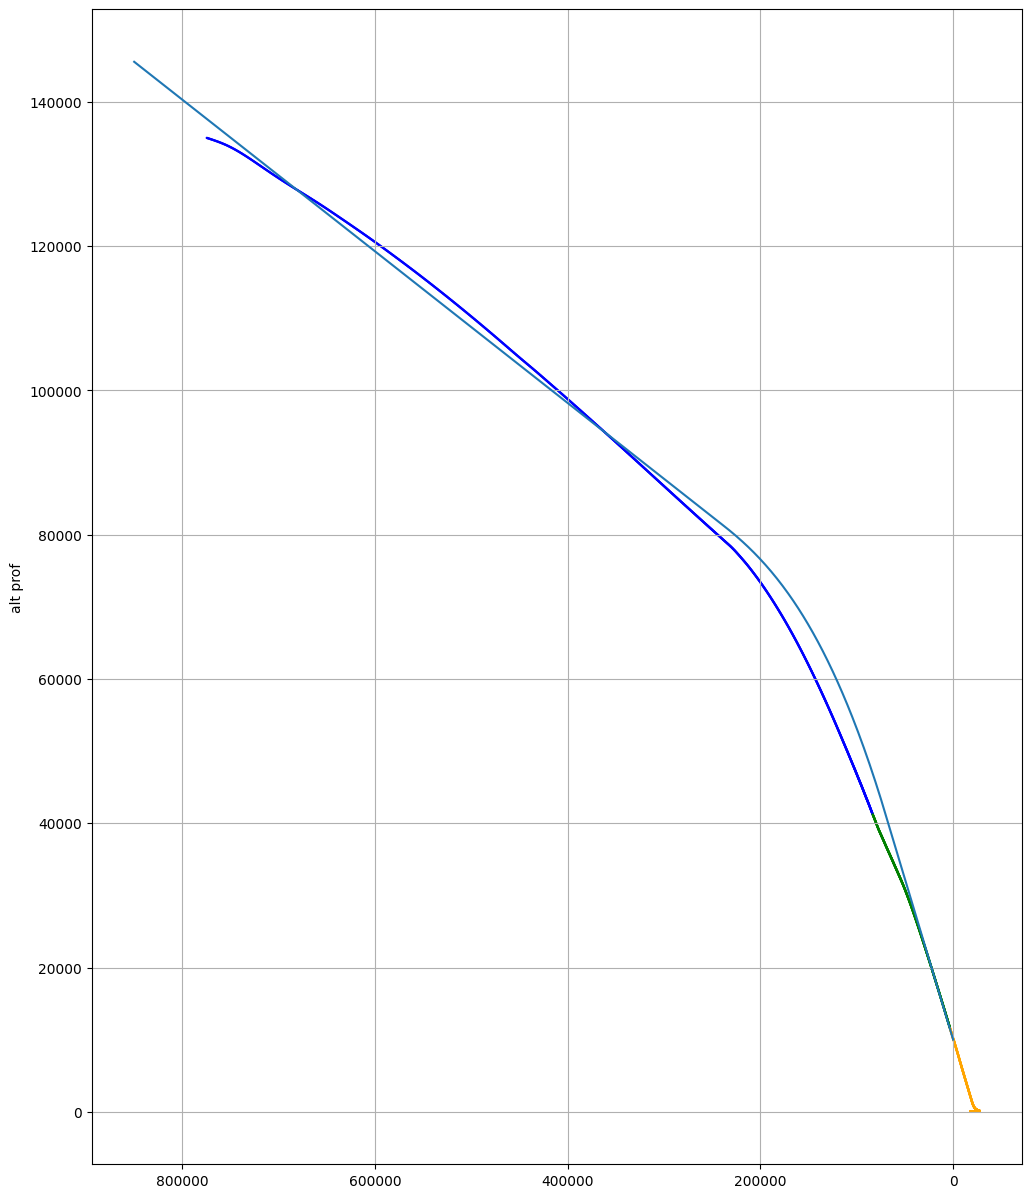

In [89]:
def href_(drpred):

    tggs = 0.44522869
    pbgc = 0.1051042
    hali = 10018

    pbrc = [0, 0]
    pbhc = [0, 0]

    pbrc[0] = 70000
    pbhc[0] = hali + pbrc[0] * tggs

    pbrc[1] = 237527.82
    pbhc[1] = 81161.826


    dpbrc = pbrc[1] -  pbrc[0]
    dpbhc = pbhc[1] -  pbhc[0]

    chi = dpbhc / (dpbrc**2) - tggs / dpbrc
    th = (pbgc - tggs) / (2*dpbrc)

    cubic_c3 = 3*chi - 2*th
    cubic_c4 = 2*(th - chi) / dpbrc
    
    if (drpred > pbrc[1]):
        return pbhc[1] + pbgc * (drpred - pbrc[1])
    elif (drpred < pbrc[0]):
        return hali + tggs * drpred
    else:
        drpred_1 = drpred -  pbrc[0]
        return pbhc[0] + tggs * drpred_1 + (cubic_c3 + drpred_1 * cubic_c4) * drpred_1**2



drpred = np.linspace(0, 850000, 1000)


href = [href_(r) for r in drpred]



fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 15))

plt_ = ax

plt_.plot(drpred, href)

plt_.scatter(data_taem['drpred'], data_taem['h'], s=0.5, c=data_taem['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)

plt_.set_ylabel('alt prof')
plt_.grid()


plt_.invert_xaxis()


Text(0, 0.5, 'EOW')

Text(0, 0.5, 'EOW')

(0.0, 200000.0)

(0.0, 200000.0)

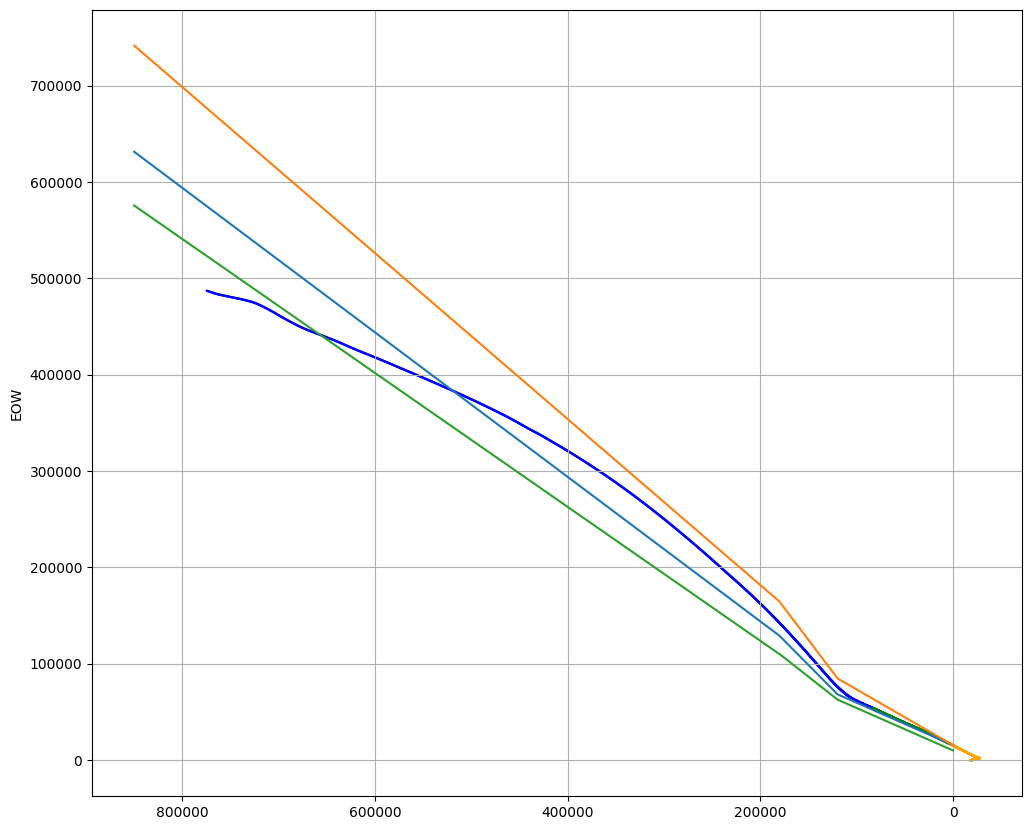

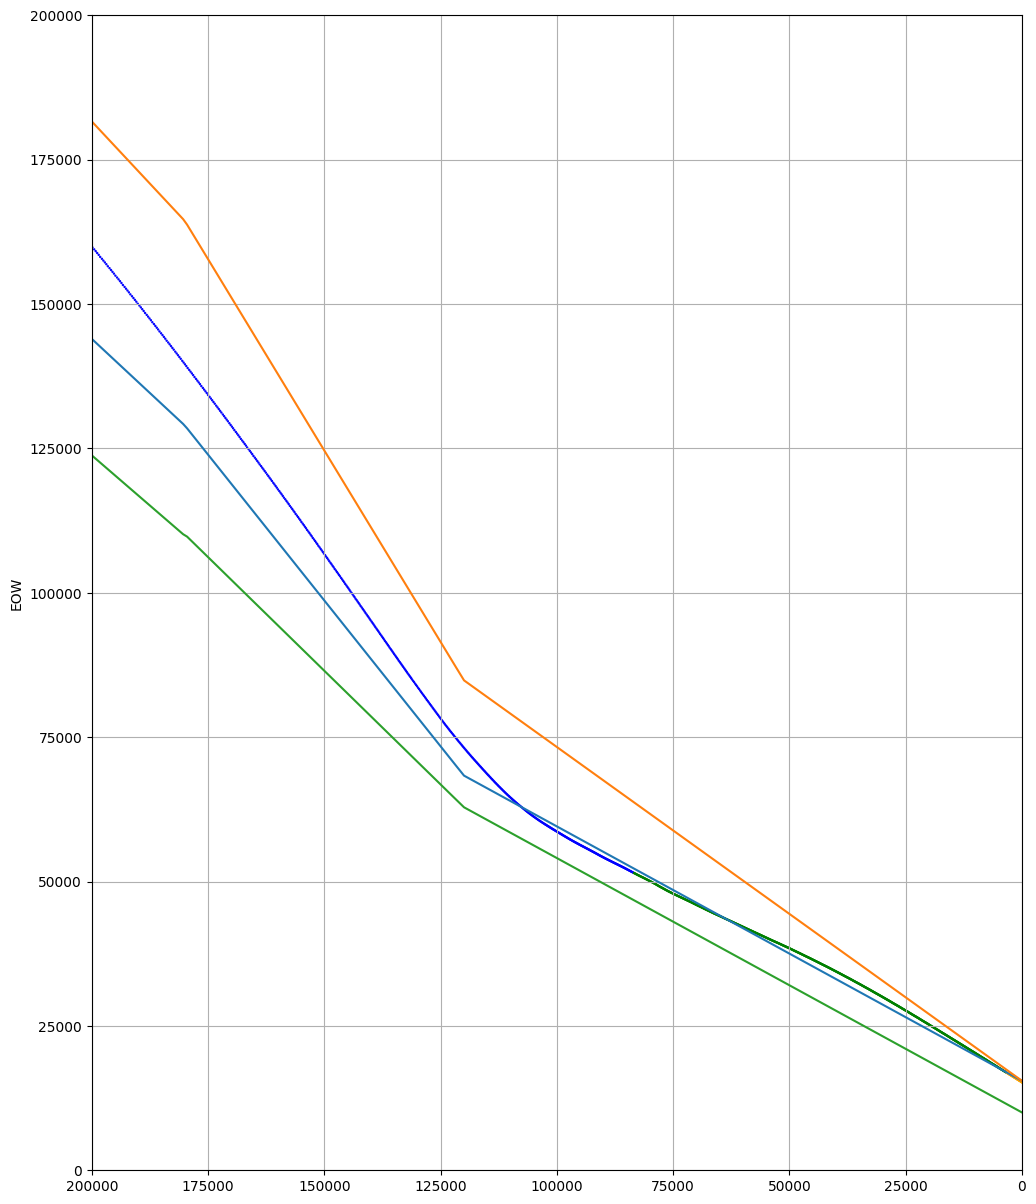

In [90]:

def emep2_(drpred):
    
    emep_c1 = [-15256.6, -31586, 10018]
    emep_c2 = [0.69517, 0.7871, 0.4404]
    
    eow_spt = [180000, 120000, -1]
    
    iel = 0
    while (drpred <= eow_spt[iel]):
        iel += 1
    
    emep = emep_c1[iel] + drpred * emep_c2[iel] 
    
    return emep

def en2_(drpred):
    
    en_c1 = [-6052, -52852, 15500]
    en_c2 = [0.75, 1.01, 0.4404]

    eow_spt = [180000, 120000, -1]
    
    iel = 0
    while (drpred <= eow_spt[iel]):
        iel += 1
    
    en = en_c1[iel] + drpred * en_c2[iel] 
    
    return en


def es2_(drpred):
    
    es_c1 = [9296.6, -74192.8, 15500]
    es_c2 = [0.8615, 1.32533, 0.57789]

    eow_spt = [180000, 120000, -1]

    iel = 0
    while (drpred <= eow_spt[iel]):
        iel += 1
    
    es = es_c1[iel] + drpred * es_c2[iel] 
    
    
    return es


drpred = np.linspace(0, 850000, 1000)


en2 = [en2_(r) for r in drpred]
emep2 = [emep2_(r) for r in drpred]
es2 = [es2_(r) for r in drpred]




fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 15))

plt_ = ax

plt_.set_ylabel('EOW')
plt_.grid()

plt_.set_aspect('equal')

plt_.invert_xaxis()


plt_.scatter(data_taem['drpred'], (data_taem['eow'] + data_taem['herror']), s=0.5, c=data_taem['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)

plt_.plot(drpred, en2)
plt_.plot(drpred, es2)
plt_.plot(drpred, emep2)




fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 15))

plt_ = ax

plt_.set_ylabel('EOW')
plt_.grid()

plt_.scatter(data_taem['drpred'], data_taem['eow'], s=0.5, c=data_taem['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)

plt_.plot(drpred, en2)
plt_.plot(drpred, es2)
plt_.plot(drpred, emep2)




plt_.set_xlim([0, 200000])
plt_.set_ylim([0, 200000])

plt_.invert_xaxis()

